---
## PACOTE DE VISUALIZAÇÃO SEABORN 
## DISPERSÃO, BOXPLOT E HISTOGRAMA
---

# Importando base de dados

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('tips.csv')

In [ ]:
dados.head()

# Tradução

In [ ]:
dados.columns

In [ ]:
renomear = {
    'total_bill' : 'valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert': 'sobremesa', 
    'day' : 'dia_da_semana', 
    'time' : 'hora_do_dia', 
    'size' : 'total_de_pessoas'   
}

In [ ]:
type(dados)

In [ ]:
gorjetas = dados.rename(columns = renomear)

In [ ]:
gorjetas.head(1)

In [ ]:
gorjetas.sobremesa.unique()

In [ ]:
sim_nao = {
    'No' : 'Não', 
    'Yes' : 'Sim'
}

In [ ]:
gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head(1)

In [ ]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [ ]:
gorjetas.head(1)

In [ ]:
gorjetas.dia_da_semana.unique()

In [ ]:
dias = {
    'Sun' : 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta', 
    'Fri' : 'Sexta'
}

In [ ]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [ ]:
gorjetas.head(1)

In [ ]:
gorjetas.hora_do_dia.unique()

In [ ]:
hora = {
    'Dinner' : 'Jantar',
    'Lunch' : 'Almoço'
}

In [ ]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [ ]:
gorjetas.head(1)

# Importando o Seaborn

In [ ]:
!pip install seaborn==0.9.0

In [ ]:
import seaborn as sns

In [ ]:
!pip show seaborn

# Análise 1 - Valor da conta e gorjeta

In [ ]:
gorjetas.columns

In [ ]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas)

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [ ]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

## Criando o campo porcentagem

In [ ]:
gorjetas.head(1)

In [ ]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [ ]:
gorjetas.head()

In [ ]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [ ]:
gorjetas.head(3)

In [ ]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y='porcentagem', data=gorjetas )

**Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

In [ ]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y='porcentagem', kind='line', data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

In [ ]:
gorjetas.head()

In [ ]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

In [ ]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

**Visualmente, parece que temos poucas diferenças de quem pediu a sobremesa e de quem não pediu a sobremesa**

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', data=gorjetas)

**Visualmente, a distribuição apresenta poucas diferenças**

# Análise 2 - Sobremesa

In [ ]:
gorjetas.head()

In [ ]:
gorjetas[gorjetas.sobremesa =='Sim'].describe()

In [ ]:
gorjetas[gorjetas.sobremesa =='Não'].describe()

In [ ]:
sns.catplot(x='sobremesa', y='gorjeta',data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta',col='sobremesa', data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta', y='gorjeta', col='sobremesa', hue='sobremesa', data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', col='sobremesa', hue='sobremesa', data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem',col='sobremesa',hue='sobremesa', kind='line', data=gorjetas)

**Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e não pediram sobremesa**

## Teste de hipótese

**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

> **A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [ ]:
from scipy.stats import ranksums

In [ ]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [ ]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [ ]:
r = ranksums(sobremesa, sem_sobremesa)

In [ ]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

> **A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da semana

In [ ]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [ ]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

In [ ]:
sns.catplot(x='dia_da_semana',y='valor_da_conta', data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', data=gorjetas)

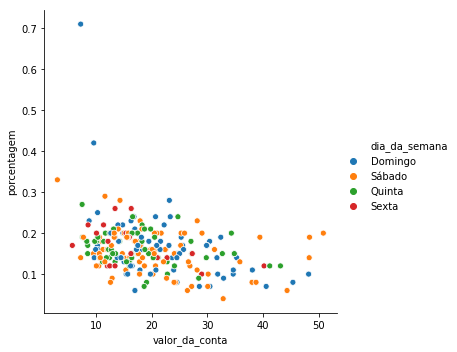

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue='dia_da_semana', col='dia_da_semana', data=gorjetas)

In [ ]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [ ]:
print('A média geral das gorjetas é de {}'.format(media_geral_gorjetas))

In [ ]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

In [ ]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

# Análise 4 - Hora do dia

In [ ]:
gorjetas.head()

In [ ]:
gorjetas.hora_do_dia.unique()

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind='swarm',data=gorjetas)

In [ ]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
sns.boxplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

In [ ]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

In [ ]:
sns.distplot(almoco)

In [ ]:
sns.distplot(almoco, kde=False)

In [ ]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

In [ ]:
sns.distplot(jantar)

In [ ]:
sns.distplot(jantar, kde=False)

In [ ]:
gorjetas.groupby(['hora_do_dia']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]